# **Spotify Songs's Genre Segmentation**🎶

---




The music recommendations made by Spotify, a music app, are excellent. It recommends music based on the songs and artists you usually listen to. The algorithm groups comparable features into clusters, and these clusters aid in comprehending the auditory properties of diverse songs. Use this specific data set to construct an automated system.


## **Data Preprocessing**

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# loading the csv data to a Pandas DataFrame
spotify = pd.read_csv('/content/drive/MyDrive/AI Projects/Project 2  - Spotify Songs’ Genre Segmentation/spotify dataset.csv')
spotify

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [ ]:
# To display the top 5 rows
spotify.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
# To display the bottom 5 rows
spotify.tail()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432
32832,29zWqhca3zt5NsckZqDf6c,Typhoon - Original Mix,Julian Calor,27,0X3mUOm6MhxR7PzxG95rAo,Typhoon/Storm,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-4.571,0,0.0385,0.000133,0.341000,0.7420,0.0894,127.984,337500


In [ ]:
# To display shape of the dataset
spotify.shape

(32833, 23)

In [ ]:
# to display all column names
spotify.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [ ]:
# Read the info of given data
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [ ]:
# To display unique values
spotify.nunique()

track_id                    28356
track_name                  23449
track_artist                10692
track_popularity              101
track_album_id              22545
track_album_name            19743
track_album_release_date     4530
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17684
duration_ms                 19785
dtype: int64

In [ ]:
# description of the dataset
spotify.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [ ]:
# To check the number of duplicated values
spotify.duplicated().sum()

0

In [ ]:
# to check is there any null values and their sum count
spotify.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [ ]:
# dattaframe of Given values
spotify[['track_artist','playlist_name','playlist_genre']].sort_values(by='playlist_genre',ascending=False)

,track_artist,playlist_name,playlist_genre
16125,Iron Maiden,Hard Rock Classics 1967-1991 (Party Edition),rock
12827,Deep Purple,Supernatural Classic Rock,rock
12820,24kGoldn,Supernatural Classic Rock,rock
12821,Warrant,Supernatural Classic Rock,rock
12822,Molly Hatchet,Supernatural Classic Rock,rock
...,...,...,...
28801,Steve Aoki,BIG-ROOM NEVER DIES !,edm
28800,J Balvin,BIG-ROOM NEVER DIES !,edm
28799,Borgeous,BIG-ROOM NEVER DIES !,edm
28798,DVBBS,BIG-ROOM NEVER DIES !,edm


In [ ]:
# minimum duration
spotify['duration_ms'].min()

4000

In [ ]:
# to display which id have the minimum duration
spotify[spotify['duration_ms'] == spotify['duration_ms'].min()]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
11363,51w6nRCU68klqNfYaaVP2j,"Hi, How're You Doin'?",DREAMS COME TRUE,0,4wdK52JVu5GzhxW3RCZ3AV,Dreams Come True,1989-03-21,City Pop 1985 シティーポップ,3j2osvmecEao5nmo9jZ5df,rock,...,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4000


In [ ]:
# maximum duration
spotify['duration_ms'].max()

517810

In [ ]:
# to display which id have the maximum duration
spotify[spotify['duration_ms'] == spotify['duration_ms'].max()]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
21327,6IoKSUyNOOheJRjiuGb1ew,47 - Remix,Anuel AA,64,0uwIB5LyXa2riRyWUwKiJA,47 (Remix),2017-03-31,Los Cangri,2hTs6GuPwhmg4ApNqxWXLE,latin,...,6,-4.891,1,0.193,0.248,0.0,0.254,0.376,146.016,517810


## **Dtata Analysis And Visualizations**

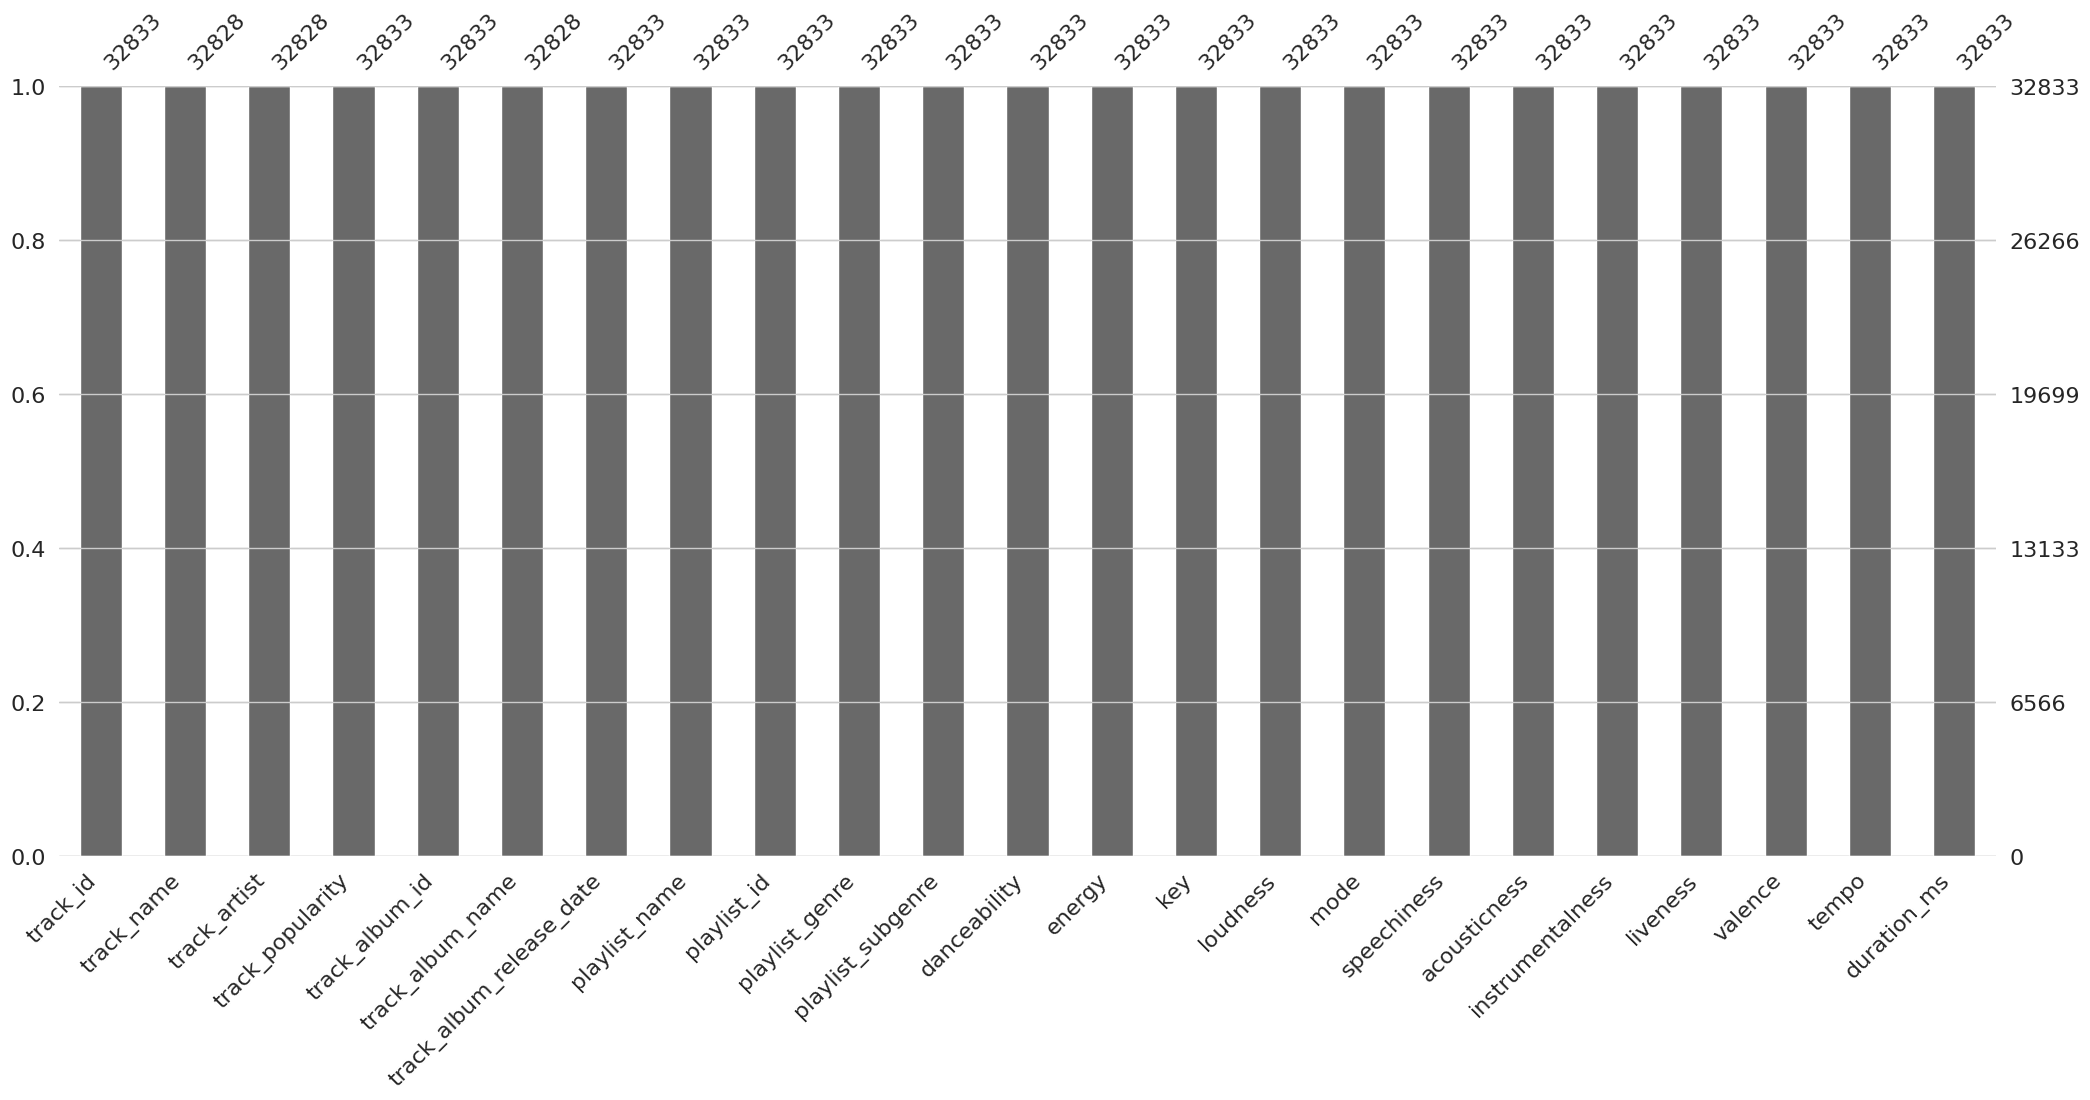

In [ ]:
#barplot
msno.bar(spotify)
plt.show()

<Axes: >

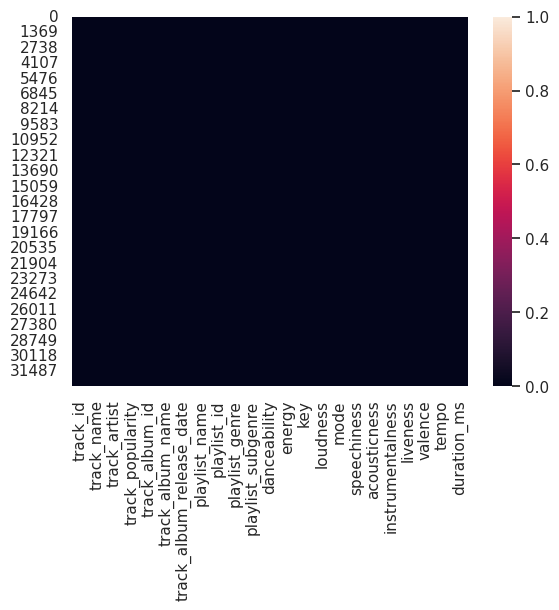

In [ ]:
# heatmap for null values
sns.heatmap(spotify.isnull())

Text(0, 0.5, 'track_popularity')

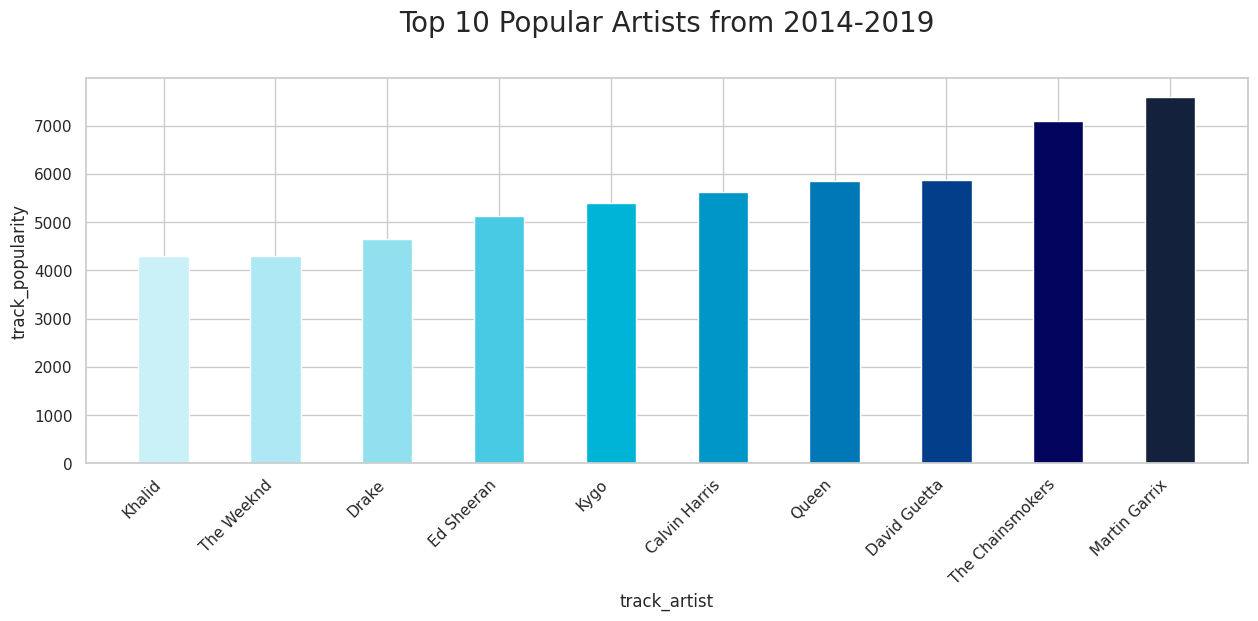

In [ ]:
#Check Top 10 Popular Artists
arpop = pd.DataFrame(spotify.groupby('track_artist')['track_popularity'].sum()).sort_values('track_popularity').tail(10).reset_index()
fig = plt.figure(figsize=(15,5))
plt.bar( arpop['track_artist'],
         arpop['track_popularity'],
         width=0.45,
         color = ['#caf0f8','#ade8f4','#90e0ef','#48cae4','#00b4d8','#0096c7','#0077b6','#023e8a','#03045e','#14213d'])
plt.xticks(rotation=45,ha='right')
plt.title('Top 10 Popular Artists from 2014-2019',y=1.1,fontsize=20)
plt.xlabel('track_artist')
plt.ylabel('track_popularity')

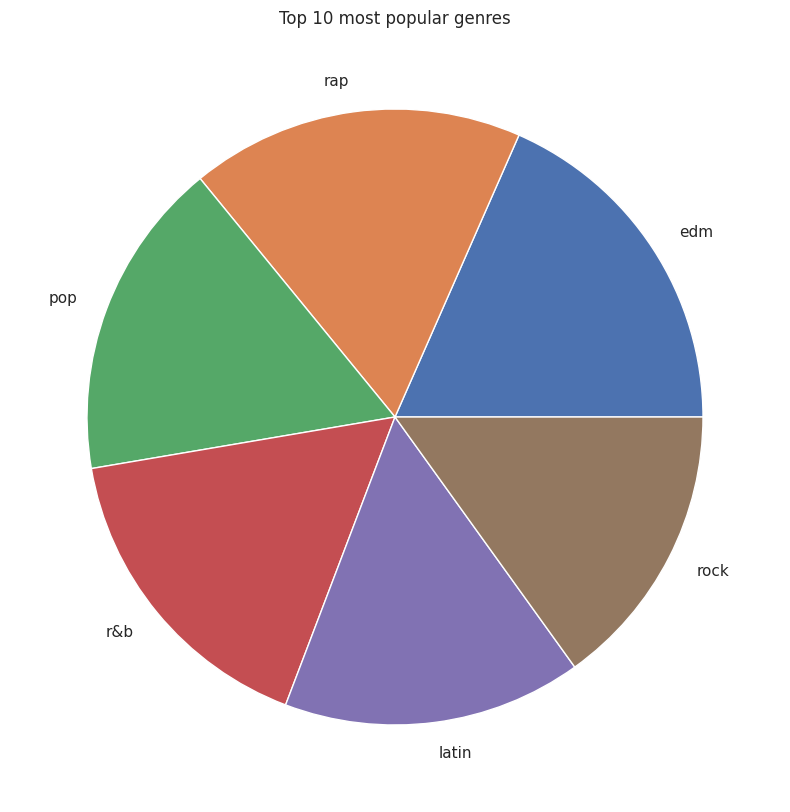

In [ ]:
#Top 10 Popular Genres
genre_values = spotify["playlist_genre"]
fig = plt.figure(figsize = (10, 10))
ax = fig.subplots()
genre_values.value_counts()[:10].plot(ax=ax, kind = "pie")
ax.set_ylabel("")
ax.set_title("Top 10 most popular genres")
plt.show()

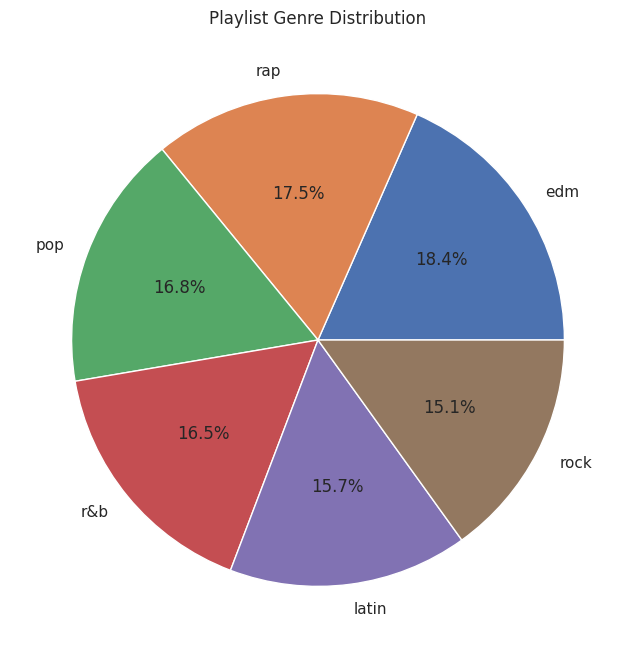

In [ ]:
# pie charts
spotify['playlist_genre'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Playlist Genre Distribution')
plt.ylabel('')
plt.show()

<Figure size 1600x800 with 0 Axes>

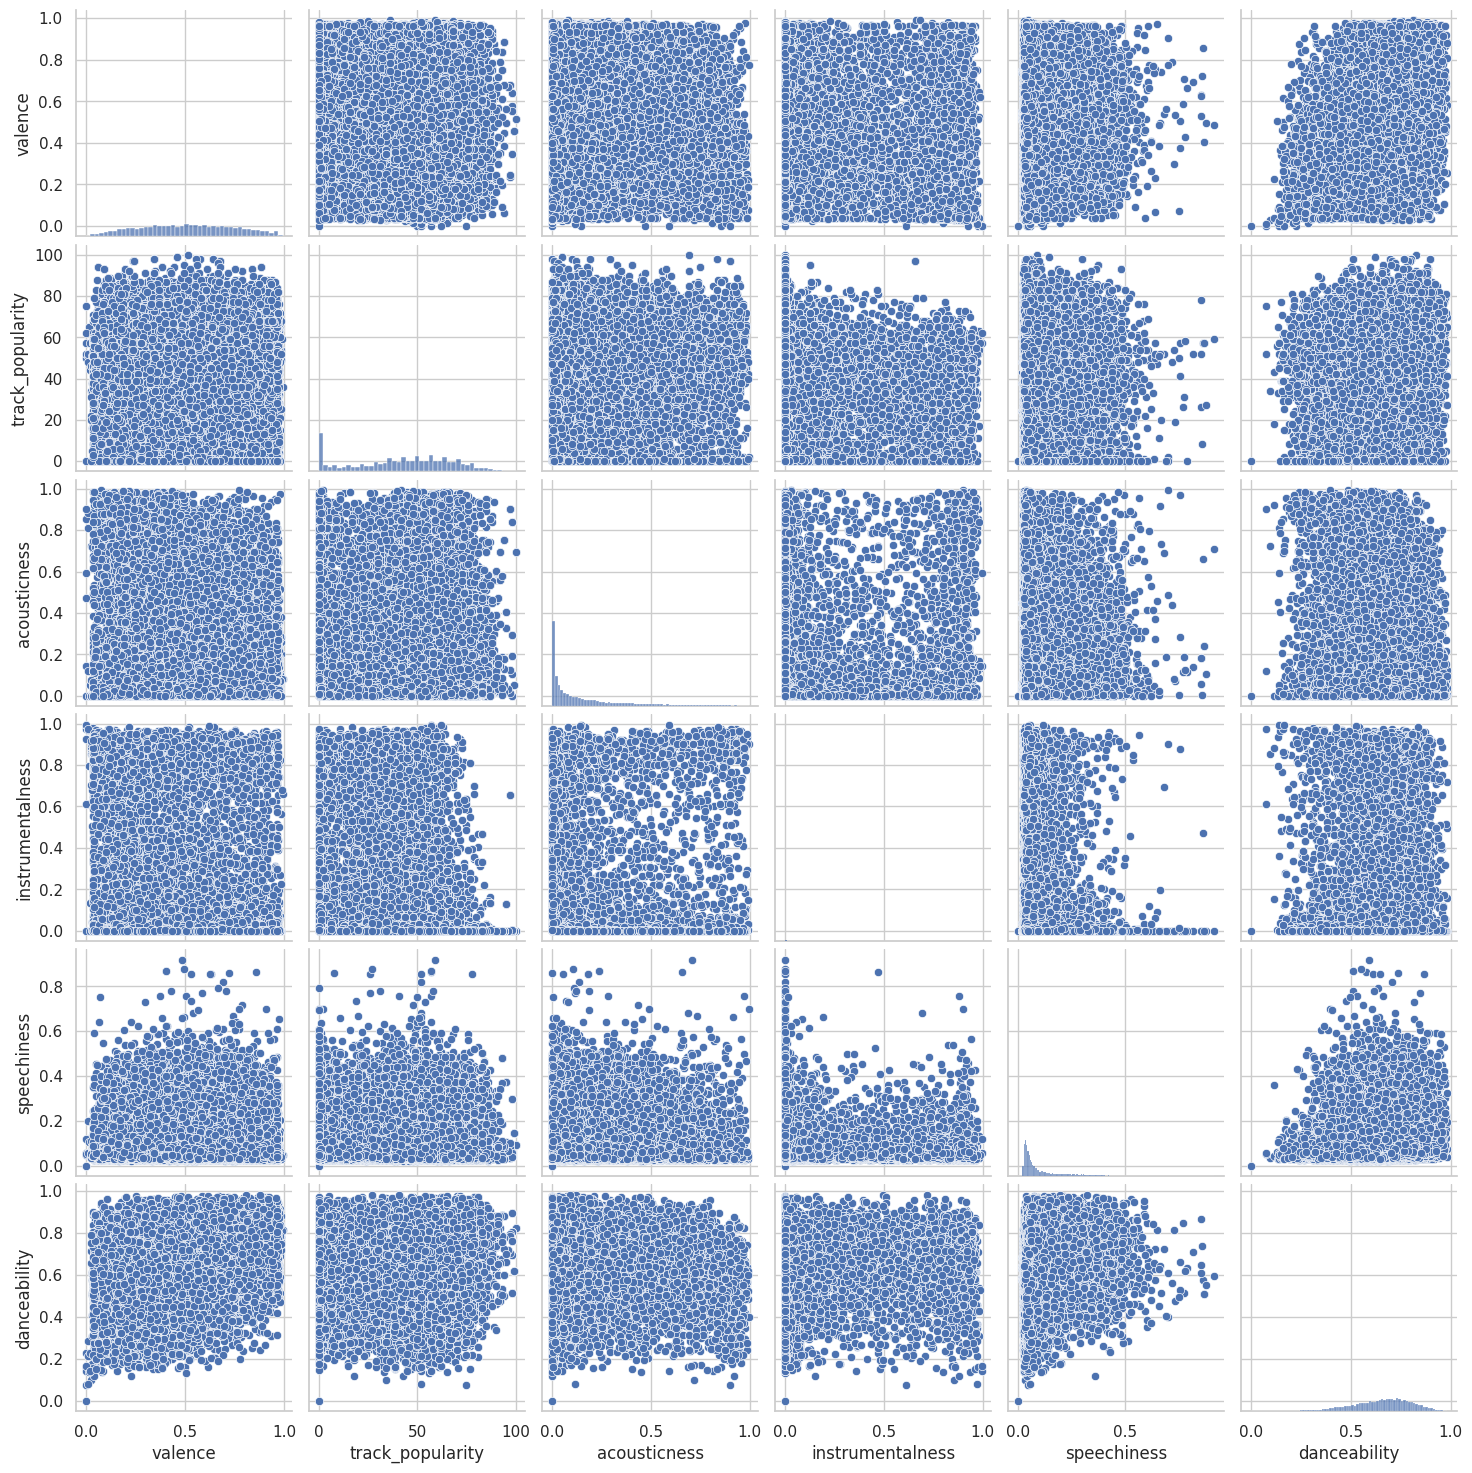

In [ ]:
#Track Popularity of Genres with respect to the various features
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
cols = ["valence","track_popularity","acousticness","instrumentalness","speechiness","danceability" ]
sns.pairplot(spotify[cols], height = 2.5 )
plt.show();

## **Correlation Matrix**

In [ ]:
# Correlation
spotify.corr()

<ipython-input-91-5df47a9c313a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spotify.corr()


,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_popularity,1.000000,0.064748,-0.109112,-0.000650,0.057687,0.010637,0.006819,0.085159,-0.149872,-0.054584,0.033231,-0.005378,-0.143682
danceability,0.064748,1.000000,-0.086073,0.011736,0.025335,-0.058647,0.181721,-0.024519,-0.008655,-0.123859,0.330523,-0.184084,-0.096879
energy,-0.109112,-0.086073,1.000000,0.010052,0.676625,-0.004800,-0.032150,-0.539745,0.033247,0.161223,0.151103,0.149951,0.012611
key,-0.000650,0.011736,0.010052,1.000000,0.000959,-0.174093,0.022607,0.004306,0.005968,0.002887,0.019914,-0.013370,0.015139
loudness,0.057687,0.025335,0.676625,0.000959,1.000000,-0.019289,0.010339,-0.361638,-0.147824,0.077613,0.053384,0.093767,-0.115058
mode,0.010637,-0.058647,-0.004800,-0.174093,-0.019289,1.000000,-0.063512,0.009415,-0.006741,-0.005549,0.002614,0.014329,0.015634
speechiness,0.006819,0.181721,-0.032150,0.022607,0.010339,-0.063512,1.000000,0.026092,-0.103424,0.055426,0.064659,0.044603,-0.089431
acousticness,0.085159,-0.024519,-0.539745,0.004306,-0.361638,0.009415,0.026092,1.000000,-0.006850,-0.077243,-0.016845,-0.112724,-0.081581
instrumentalness,-0.149872,-0.008655,0.033247,0.005968,-0.147824,-0.006741,-0.103424,-0.006850,1.000000,-0.005507,-0.175402,0.023335,0.063235
liveness,-0.054584,-0.123859,0.161223,0.002887,0.077613,-0.005549,0.055426,-0.077243,-0.005507,1.000000,-0.020560,0.021018,0.006138


In [ ]:
TARGET="duration_ms"

<ipython-input-93-f71706b44c58>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = spotify.corr()


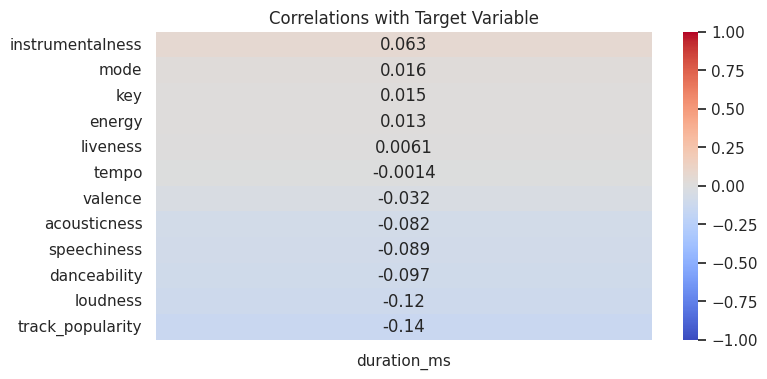

In [ ]:
correlation_matrix = spotify.corr()
#We only take the correlations with 'target'.
target_correlation = correlation_matrix[TARGET].sort_values(ascending=False)
target_correlation = target_correlation.drop("duration_ms")

plt.figure(figsize=(8, 4))
sns.heatmap(target_correlation.to_frame(), cmap="coolwarm", annot=True, vmin=-1, vmax=1)
plt.title("Correlations with Target Variable")
plt.show()

<ipython-input-94-a02c11c180ce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = spotify.corr()


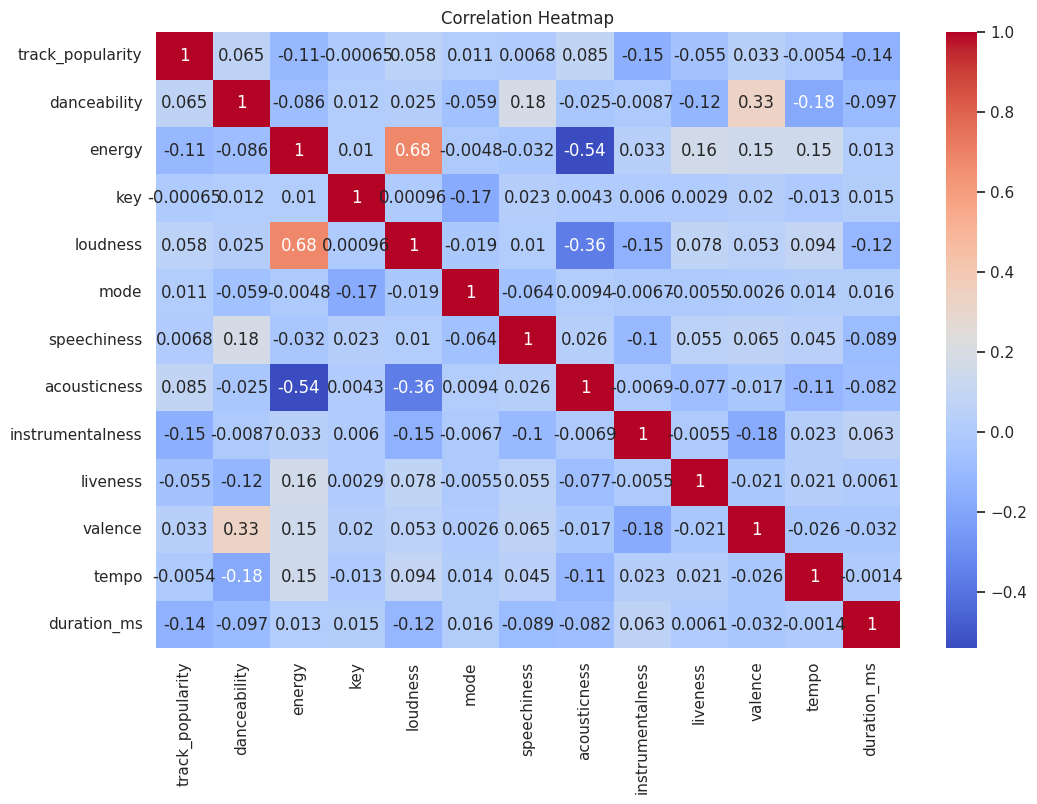

In [ ]:
#correlation matrix
correlation_matrix = spotify.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## **Plot Diffrent Clusters**

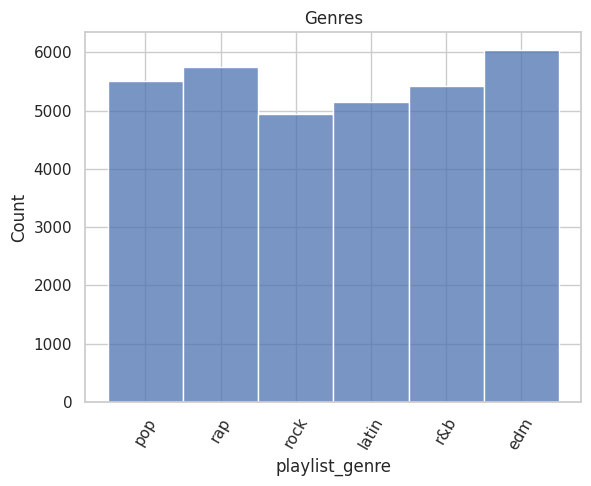

In [ ]:
#histogram Plot
ax = sns.histplot(spotify["playlist_genre"])
_ = plt.xticks(rotation=60)
_ = plt.title("Genres")

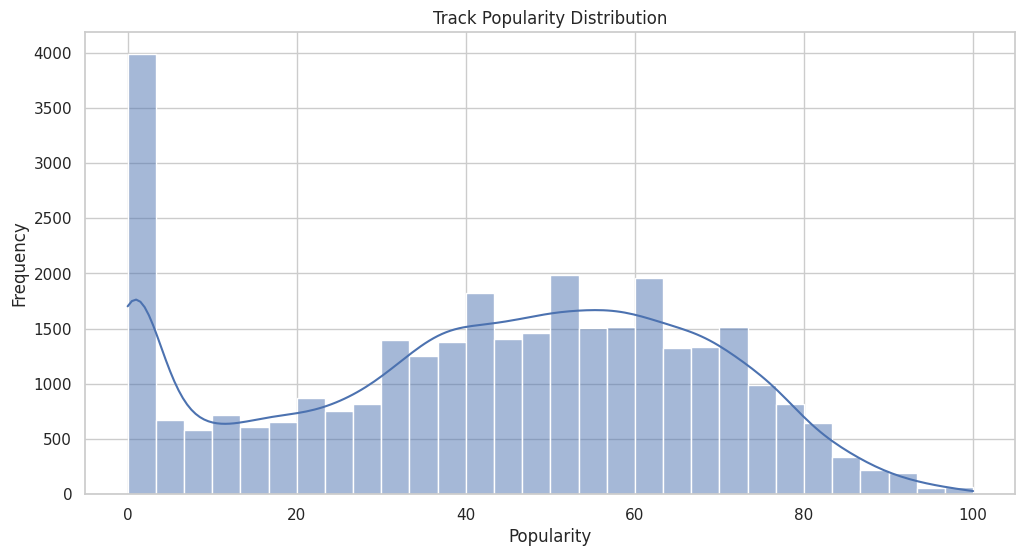

In [ ]:
#historgam
plt.figure(figsize=(12, 6))
sns.histplot(data=spotify, x='track_popularity', bins=30, kde=True)
plt.title('Track Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


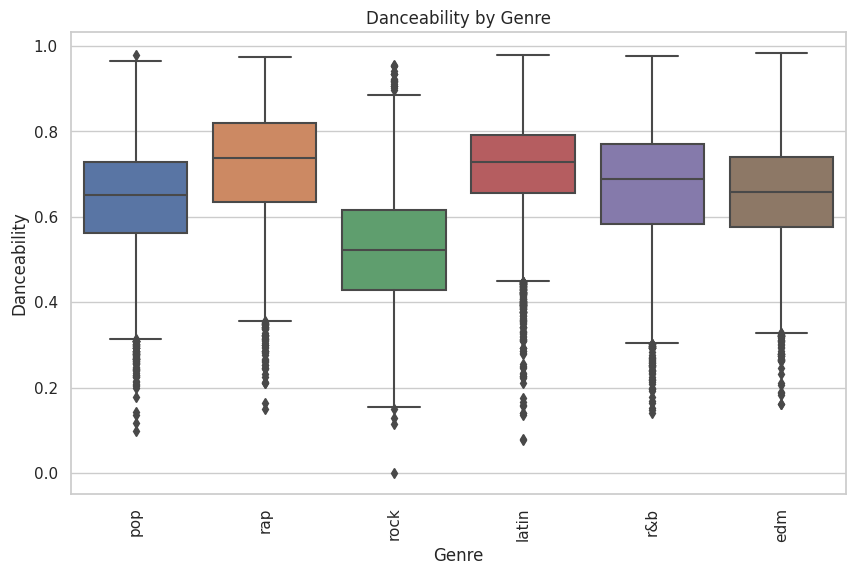

In [ ]:
#box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=spotify, x='playlist_genre', y='danceability')
plt.title('Danceability by Genre')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Danceability')
plt.show()

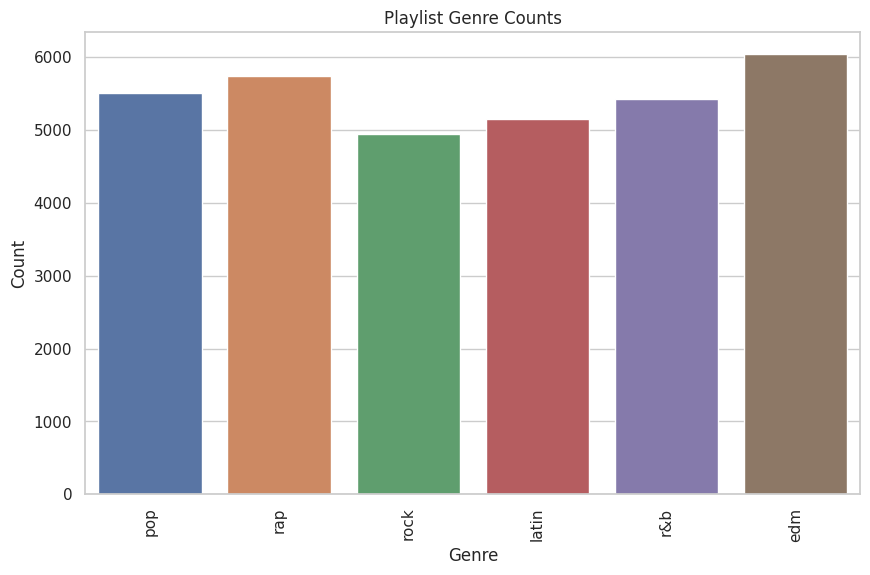

In [ ]:
#bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=spotify, x='playlist_genre')
plt.title('Playlist Genre Counts')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

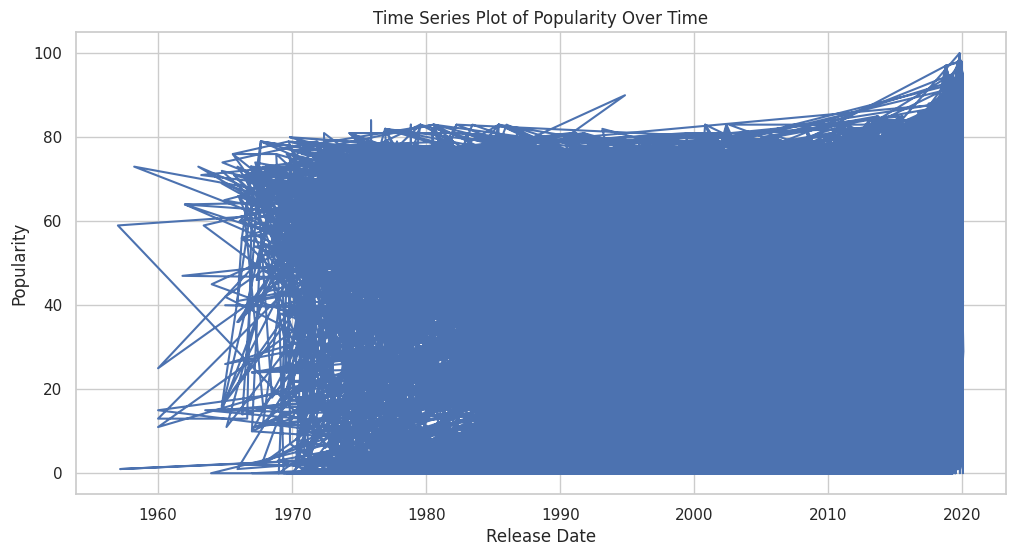

In [ ]:
#time series plots
spotify['track_album_release_date'] = pd.to_datetime(spotify['track_album_release_date'])
plt.figure(figsize=(12, 6))
plt.plot(spotify['track_album_release_date'], spotify['track_popularity'])
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.title('Time Series Plot of Popularity Over Time')
plt.show()

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
spotify['playlist_genre_encoded'] = label_encoder.fit_transform(spotify['playlist_genre'])
spotify['playlist_name_encoded'] = label_encoder.fit_transform(spotify['playlist_name'])

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
num_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
spotify[num_features] = scaler.fit_transform(spotify[num_features])

In [ ]:
# Select the features for clustering
X = spotify[['playlist_genre_encoded', 'playlist_name_encoded'] + num_features]

In [ ]:
#determine the number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

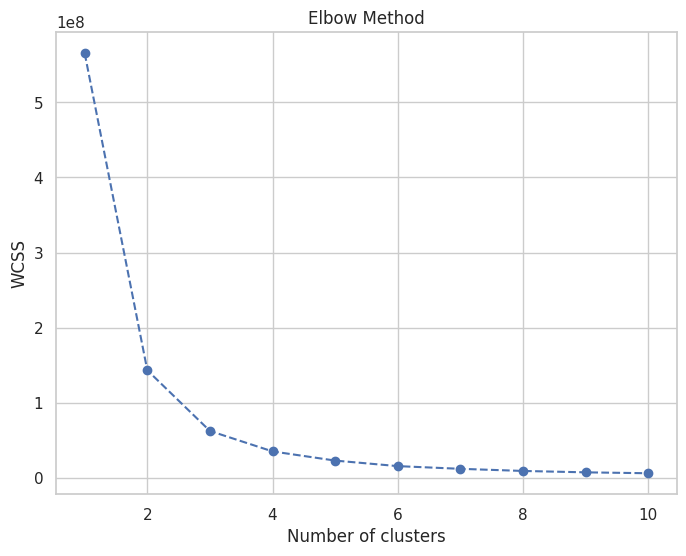

In [ ]:
# Plot the Elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Choosing the optimal number of clusters and perform clustering
n_clusters = 3

In [ ]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
spotify['cluster'] = kmeans.fit_predict(X)

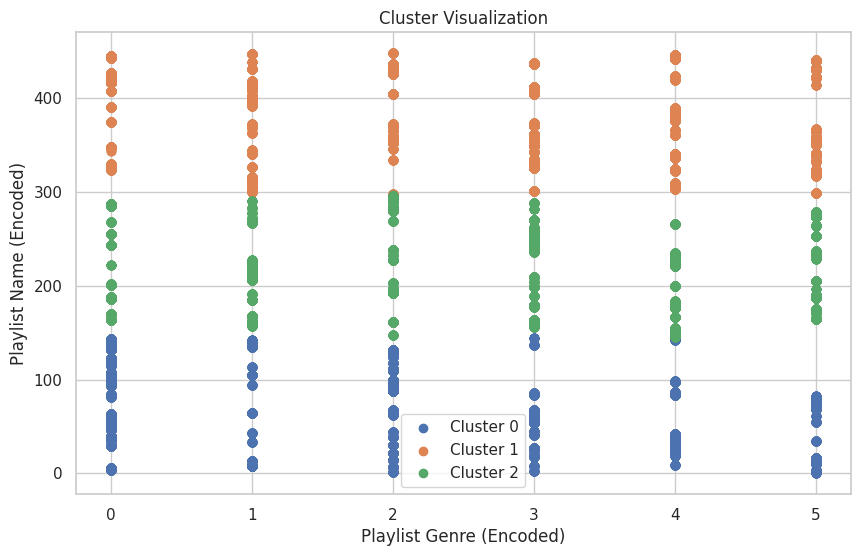

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    cluster_df = spotify[spotify['cluster'] == i]
    plt.scatter(cluster_df['playlist_genre_encoded'], cluster_df['playlist_name_encoded'], label=f'Cluster {i}')
plt.title('Cluster Visualization')
plt.xlabel('Playlist Genre (Encoded)')
plt.ylabel('Playlist Name (Encoded)')
plt.legend()
plt.show()

In [ ]:
spotify['cluster'] = kmeans.labels_
user_cluster = 1
recommended_playlists = spotify[spotify['cluster'] == user_cluster]['playlist_name'].unique()

In [ ]:
# Display the recommended playlists
print("Recommended Playlists:")
for playlist in recommended_playlists:
    print(playlist)

Recommended Playlists:
Todo Éxitos
Ultimate Indie Presents... Best Indie Tracks of the 2010s
TUNES DANCE AND POP
The Sound of Post-Teen Pop
post-teen alternative, indie, pop (large variety)
🤩🤪Post Teen Pop🤪🤩
Someone You Loved Lewis Capaldi (Pop Music Mix)
a taste of the mainstream
post teen pop
Post-teen pop
post-teen pop
This Is: Javiera Mena
This Is Janelle Monáe
The Sound of Indie Poptimism
The Edge of Indie Poptimism
indie poptimism🕺🏻
The Pulse of Indie Poptimism
random playlist that can't decide its genre so go ahead jam along with these catchy tunes
indie poptimism
RapCaviar
RAP 91
This Is Logic
Rap Workout
Southern Hip Hop
Southern California Hip Hop Primer
Viral Southern Hip Hop
◤ Hip Hop Dance Music – Urban – Trap – Breaking Locking Popping Bopping – WOD – World of Dance
The Sound of Southern Hip Hop
Southern Soul BBQ Mix
🔥💵 Hip Hop, Rap, Heavy 808's - New School
Southern soul & hip hop
Russian Gangster Rap
RAP Gangsta
RUSSIAN Gangster Rap
Rap Party 24/7 Radio / Gangsta Rap
Zo